# Loan Approval Prediction

## Import dataset

In [1]:
import pandas as pd

def load_data(path):
    return pd.read_csv(path)

loans = load_data('./datasets/loan-train.csv')
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Adjust Features

Modify existing features

In [2]:
loans['ApplicantIncome'] = loans['ApplicantIncome'].apply(lambda x: x*12/1000)

loans['CoapplicantIncome'] = loans['CoapplicantIncome'].apply(lambda x: x*12/1000)


Add new features

In [3]:
loans['JointIncome'] = loans['ApplicantIncome'] + loans['CoapplicantIncome']

# loans['LoanPerTerm'] = loans['LoanAmount'] / loans['Loan_Amount_Term'] * 12

# loans['IncomeLoanRatio'] = loans['JointIncome'] / loans['LoanPerTerm']

# loans['CoapplicantContributionRatio'] = loans['CoapplicantIncome'] / loans['JointIncome']

Remove unnecessary features

In [4]:
loans = loans.drop(['Loan_ID', 'CoapplicantIncome'], axis=1)

Remove Outliers

In [5]:
# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

# loans = remove_outlier(loans, 'ApplicantIncome')
# loans = remove_outlier(loans, 'CoapplicantIncome')
# loans = remove_outlier(loans, 'LoanAmount')
# loans = remove_outlier(loans, 'LoanPerTerm')


## Analyze data

In [6]:
loans.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,JointIncome
0,Male,No,0,Graduate,No,70.188,NaN,360.0,1.0,Urban,Y,70.188
1,Male,Yes,1,Graduate,No,54.996,128.0,360.0,1.0,Rural,N,73.092
2,Male,Yes,0,Graduate,Yes,36.000,66.0,360.0,1.0,Urban,Y,36.000
3,Male,Yes,0,Not Graduate,No,30.996,120.0,360.0,1.0,Urban,Y,59.292
4,Male,No,0,Graduate,No,72.000,141.0,360.0,1.0,Urban,Y,72.000


In [7]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            601 non-null    object 
 1   Married           611 non-null    object 
 2   Dependents        599 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     582 non-null    object 
 5   ApplicantIncome   614 non-null    float64
 6   LoanAmount        592 non-null    float64
 7   Loan_Amount_Term  600 non-null    float64
 8   Credit_History    564 non-null    float64
 9   Property_Area     614 non-null    object 
 10  Loan_Status       614 non-null    object 
 11  JointIncome       614 non-null    float64
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [8]:
loans.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,JointIncome
count,614.000000,592.000000,600.00000,564.000000,614.000000
mean,64.841511,146.412162,342.00000,0.842199,84.296461
std,73.308500,85.587325,65.12041,0.364878,77.503966
min,1.800000,9.000000,12.00000,0.000000,17.304000
25%,34.530000,100.000000,360.00000,1.000000,49.992000
50%,45.750000,128.000000,360.00000,1.000000,64.998000
75%,69.540000,168.000000,360.00000,1.000000,90.261000
max,972.000000,700.000000,480.00000,1.000000,972.000000


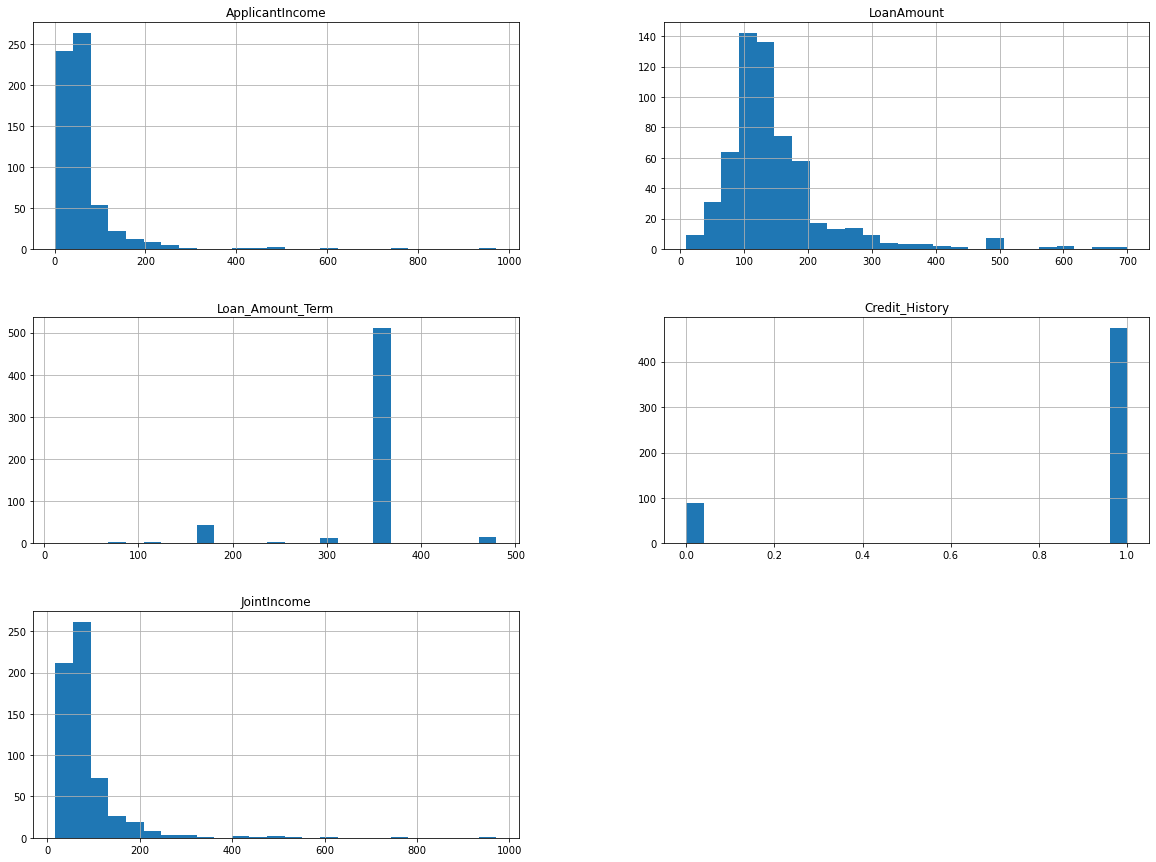

In [9]:
import matplotlib.pyplot as plt
loans.hist(bins=25, figsize=(20,15))
plt.show()

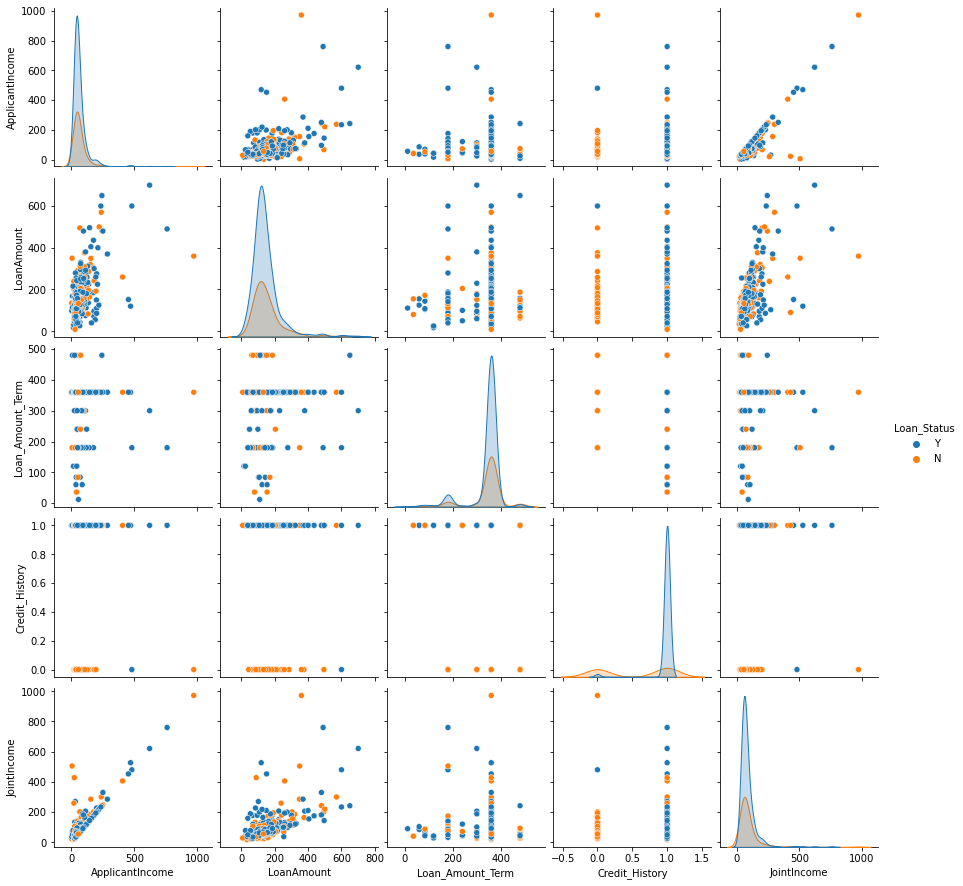

In [10]:
import seaborn as sb

sb.pairplot(loans, hue="Loan_Status")

It appears that peope with no credit history, are much more likely to not be approved for a loan

<AxesSubplot:>

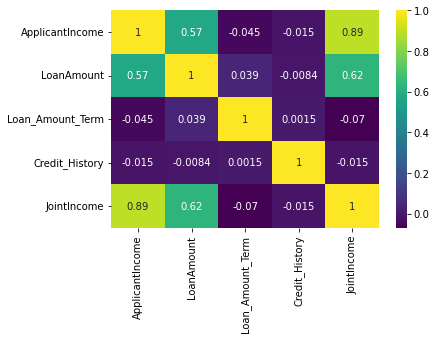

In [11]:
corr_matrix = loans.corr()

color_palette = 'viridis'

sb.heatmap(corr_matrix, cmap=color_palette, annot=True)

In [12]:
import numpy as np

def plot_scatter(df, col_name_x, col_name_y, color_col_name):
    labels, index = np.unique(df[color_col_name], return_inverse=True)

    fig, ax = plt.subplots()
    sc = ax.scatter(df[col_name_x], df[col_name_y], marker = 'o', c = index, alpha = 0.6)
    ax.legend(sc.legend_elements()[0], labels)
    plt.show()

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
C:\Users\Connor\anaconda3\lib\site-packages\matplotlib\colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
C:\Users\Connor\anaconda3\lib\site-packages\matplotlib\ticker.py:547: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


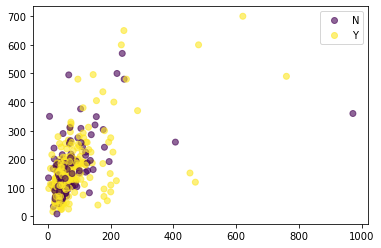

In [13]:
plot_scatter(loans, 'ApplicantIncome', 'LoanAmount', 'Loan_Status')

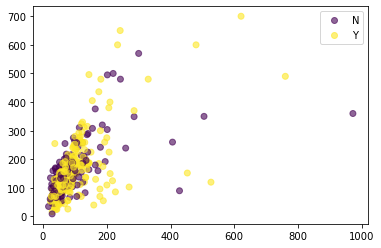

In [14]:
plot_scatter(loans, 'JointIncome', 'LoanAmount', 'Loan_Status')

The points appear to make a sort of cone shape. It also seems the left edge of points are mostly not accepted and the right edge are mostly accepted, so the ratio between joint income and loan amount may have an impact on acceptance so lets add that feature.

In [15]:
loans['JointIncome_LoanAmount_Ratio'] = loans['JointIncome'] / loans['LoanAmount']

## Fill missing values

Find rows with missing values

In [16]:
sample_incomplete_rows = loans[loans.isnull().any(axis=1)]
sample_incomplete_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 605
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        121 non-null    object 
 1   Married                       131 non-null    object 
 2   Dependents                    119 non-null    object 
 3   Education                     134 non-null    object 
 4   Self_Employed                 102 non-null    object 
 5   ApplicantIncome               134 non-null    float64
 6   LoanAmount                    112 non-null    float64
 7   Loan_Amount_Term              120 non-null    float64
 8   Credit_History                84 non-null     float64
 9   Property_Area                 134 non-null    object 
 10  Loan_Status                   134 non-null    object 
 11  JointIncome                   134 non-null    float64
 12  JointIncome_LoanAmount_Ratio  112 non-null    float64
dtypes: fl

Credit history is a binary value, we will assume a missing credit history value to mean there is no credit history and therefore should be 0

In [17]:
loans["Credit_History"].fillna(0, inplace=True)

Gender is categorical, we will assume a missing gender to be unknown or other so a new value will be added (Unknown/Other)

In [18]:
loans["Gender"].fillna("Unknown/Other", inplace=True)

Dependents is integer data, which is sensitive to using the median, we will replace missing dependent data with the average value

Dependents has some values which are "3+", these should be converted to 3 first however to ensure an accurate average is calculated

In [19]:
#make dependents a float
Dependents = loans["Dependents"].replace("3+", 3)
Dependents = Dependents.astype(float)
loans["Dependents"] = Dependents

avg_dependents = loans["Dependents"].mean()
loans["Dependents"].fillna(avg_dependents, inplace=True)

print(f"average dependents: {avg_dependents}")

average dependents: 0.7629382303839732


Married is a binary value, we will assume a missing married value to mean the applicant is not married so the value will be "No"

In [20]:
loans["Married"].fillna("No", inplace=True)

Self_Employed is a binary value, we will assume a missing Self_Employed value to mean the applicant is not Self_Employed so the value will be "No"


In [21]:
loans["Self_Employed"].fillna("No", inplace=True)

LoanAmount is a float, we will replace missing values with the median

In [22]:
median_loan_amount = loans["LoanAmount"].median()
loans["LoanAmount"].fillna(median_loan_amount, inplace=True)

Loan_Amount_Term is integer data, which is sensitive to using the median, we will replace missing Loan_Amount_Term data with the average value

In [23]:
avg_term = loans["Loan_Amount_Term"].mean()
loans["Loan_Amount_Term"].fillna(avg_term, inplace=True)

recompute JointIncome and LoanAmount Ratio to remove null values

In [24]:
loans['JointIncome_LoanAmount_Ratio'] = loans['JointIncome'] / loans['LoanAmount']

Ensure there are no more rows with null values

In [25]:
sample_incomplete_rows = loans[loans.isnull().any(axis=1)]
sample_incomplete_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        0 non-null      object 
 1   Married                       0 non-null      object 
 2   Dependents                    0 non-null      float64
 3   Education                     0 non-null      object 
 4   Self_Employed                 0 non-null      object 
 5   ApplicantIncome               0 non-null      float64
 6   LoanAmount                    0 non-null      float64
 7   Loan_Amount_Term              0 non-null      float64
 8   Credit_History                0 non-null      float64
 9   Property_Area                 0 non-null      object 
 10  Loan_Status                   0 non-null      object 
 11  JointIncome                   0 non-null      float64
 12  JointIncome_LoanAmount_Ratio  0 non-null      float64
dtypes: float64(7), ob

## Replace binary categorical data with binary int data

Education

In [26]:
education = loans["Education"].replace("Graduate", 1)
education = education.replace("Not Graduate", 0)
education = education.astype(float)
loans["Education"] = education


Married

In [27]:
married = loans["Married"].replace("Yes", 1)
married = married.replace("No", 0)
married = married.astype(float)
loans["Married"] = married

Self_Employed

In [28]:
self_employed = loans["Self_Employed"].replace("Yes", 1)
self_employed = self_employed.replace("No", 0)
self_employed = self_employed.astype(float)
loans["Self_Employed"] = self_employed

Loan_Status

In [29]:
loan_status = loans["Loan_Status"].replace("Y", 1)
loan_status = loan_status.replace("N", 0)
loan_status = loan_status.astype(float)
loans["Loan_Status"] = loan_status

## Replace categorical data with one hot encoded data

Replacing Gender and Property_Area

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_attributes = ["Gender", "Property_Area"]

cat_encoder = OneHotEncoder(sparse=False)

loans_1hot = pd.DataFrame(cat_encoder.fit_transform(loans[cat_attributes]))

loans = loans.join(loans_1hot, rsuffix="_1hot")

loans.drop(cat_attributes, axis=1, inplace=True)

loans.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,JointIncome,JointIncome_LoanAmount_Ratio,0,1,2,3,4,5
0,0.0,0.0,1.0,0.0,70.188,128.0,360.0,1.0,1.0,70.188,0.548344,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,54.996,128.0,360.0,1.0,0.0,73.092,0.571031,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,1.0,36.000,66.0,360.0,1.0,1.0,36.000,0.545455,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,30.996,120.0,360.0,1.0,1.0,59.292,0.494100,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,72.000,141.0,360.0,1.0,1.0,72.000,0.510638,0.0,1.0,0.0,0.0,0.0,1.0


## Scale attributes

Scaling all numerical attributes

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attributes = ["ApplicantIncome", "LoanAmount", "Loan_Amount_Term", "JointIncome", "JointIncome_LoanAmount_Ratio"]

scaler = StandardScaler()

loans_scaled = pd.DataFrame(scaler.fit_transform(loans[num_attributes]))

loans = loans.join(loans_scaled, rsuffix="_scaled")

loans.drop(num_attributes, axis=1, inplace=True)

loans.head()

KeyError: "None of [Index(['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'JointIncome',\n       'JointIncome_LoanAmount_Ratio'],\n      dtype='object')] are in the [columns]"

## Create Model

Split into training full and test sets

In [130]:
from sklearn.model_selection import train_test_split

x_train_full, x_test, y_train_full, y_test = train_test_split(loans.drop("Loan_Status", axis=1), loans.Loan_Status, train_size=0.8)
x_train_full.shape

(491, 16)

In [131]:
x_valid, x_train = x_train_full[:91], x_train_full[91:]
y_valid, y_train = y_train_full[:91], y_train_full[91:]
x_valid.shape

(91, 16)

In [177]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16,)),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 4)                 68        
                                                                 
 dense_65 (Dense)            (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [178]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [179]:
history = model.fit(x_train, y_train, epochs=30, batch_size=8, validation_data=(x_valid, y_valid))

Epoch 1/30
50/50 [==============================] - 1s 4ms/step - loss: 1.5768 - accuracy: 0.3200 - val_loss: 1.3022 - val_accuracy: 0.2857
Epoch 2/30
50/50 [==============================] - 0s 1ms/step - loss: 1.2532 - accuracy: 0.3150 - val_loss: 1.0614 - val_accuracy: 0.3077
Epoch 3/30
50/50 [==============================] - 0s 1ms/step - loss: 1.0576 - accuracy: 0.3300 - val_loss: 0.9184 - val_accuracy: 0.2967
Epoch 4/30
50/50 [==============================] - 0s 1ms/step - loss: 0.9357 - accuracy: 0.3325 - val_loss: 0.8219 - val_accuracy: 0.3077
Epoch 5/30
50/50 [==============================] - 0s 1ms/step - loss: 0.8518 - accuracy: 0.3800 - val_loss: 0.7615 - val_accuracy: 0.3407
Epoch 6/30
50/50 [==============================] - 0s 1ms/step - loss: 0.7992 - accuracy: 0.4200 - val_loss: 0.7177 - val_accuracy: 0.4725
Epoch 7/30
50/50 [==============================] - 0s 1ms/step - loss: 0.7606 - accuracy: 0.4800 - val_loss: 0.6917 - val_accuracy: 0.5934
Epoch 8/30
50/50 [==

In [180]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.6044 - accuracy: 0.7236


[0.604389488697052, 0.7235772609710693]

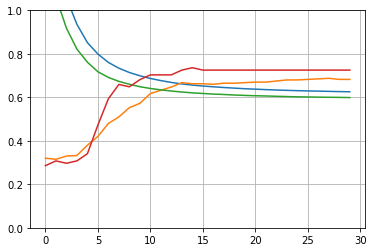

In [181]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
#blue is loss
#green is val_loss
#orange is accuracy
#red is val_accuracy